$\underline{Homework 1: Rocket Flight}$


Bryssinck Paul & Alexandre de Becker

Le but du devoir est de calculer la trajectoire d'une fusée à l'aide de la méthode d'Euler

 Avant toute chose, importons les bibliothèques utiles nécessaire à la résolution du problème.

In [42]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16



Pour commencer la résolution du problème, établissons une fonction qui nous permet d'avoir la masse du système en fonction du temps vu que celle-ci diminue au fur et à mesure que le carburant est consommé. 

In [5]:
def mass(t):
    time=min(5.,t)
    mass=150.-20.*time
    return mass

Nous voyons que nous somme parti d'une masse initiale de 150kg, 100kg de carburant et 50 kg pour la structure de la fusée. Celle-ci diminue de 20kg/s durant les 5 premières secondes, temps durant lequel nous avons du carburant.  

Etablissons à présent la fonction nous permettant d'obtenir l'accélération

In [6]:
def acce(t,v):
    if t>=5.:
        BR=0.
    else:
        BR=20.
    M=mass(t)
    Ve=325.
    rho=1.091
    A=np.pi*.5**2.
    Cd=.15
    g=9.81
    acceleration=(Ve*BR-g*M-.5*rho*A*Cd*v*((v**2)**.5))/(M)
    return acceleration

Celle-ci nous est donné par l'équation de la force qui s'exerce sur la fusée  


$(m_s+m_p)\frac{dv}{dt}=\frac{dm_p}{dt}v_e-\frac{1}{2}\rho v^2 A C_D -(m_s+m_p)g $

Nous avons que M est la masse au court du temps, Ve est la vitesse d'échapement, rho est la densité moyenne de l'air, A est l'aire de croisement maximal, Cd est le coeficient de trainée et g l'accélération gravitationnelle.

Etablissons à présent les fonctions nous permettant d'obtenir la vitesse et la hauteur

In [7]:
def speed(a,v):
    speed = v+0.1*a
    return speed

In [8]:
def height(v,h):
    height=max(h+.1*v,0.)
    return height

La vitesse à une étape est celle de l'étape précédente à laquelle on ajoute l'accélération multipliée par le temps entre chaque étape. Pareil pour la hauteur en multipliant par la vitesse et la hauteur sera le maximum entre la valeur obtenue lors de l'itération précédente  et 0, afin qu'on ai pas une rocket qui s'enfonce dans le sol.

Le code ci-dessous nous donne le temps, l'accélération, la vitesse ainsi que la hauteur à chaque interval de 0.1 seconde.

In [16]:
v=0.
h=0. 
t=0.
Tlog=[]
Hlog=[]
Slog=[]
Alog=[]
while h>0. or t==0:
    a=acce(t,v)
    v=speed(a,v)
    h=height(v,h)
    t=round(t+.1,2) #utilisationd de round pour éviter de se retrouver avec t=4.999999 et de faire une itération de trop avec du fuel
    
    
    Tlog.append(t)
    Hlog.append(h)
    Slog.append(v)
    Alog.append(a)
    log.append(pas)
for i in range(0,len(Tlog)):
    print(Tlog[i],Alog[i],Slog[i],Hlog[i])

Nous avons donc à présent tout les points de la trajectoire, nous pouvons alors en faire un graphique afin de mieux la visualiser. Nous en avons également fait pour la vitesse et l'accélération.

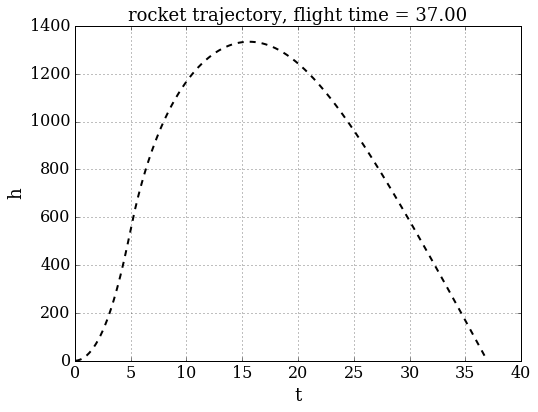

In [59]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'h', fontsize=18)
pyplot.title('rocket trajectory, flight time = %.2f' % t, fontsize=18)
pyplot.plot(Tlog,Hlog, 'k--', lw=2)

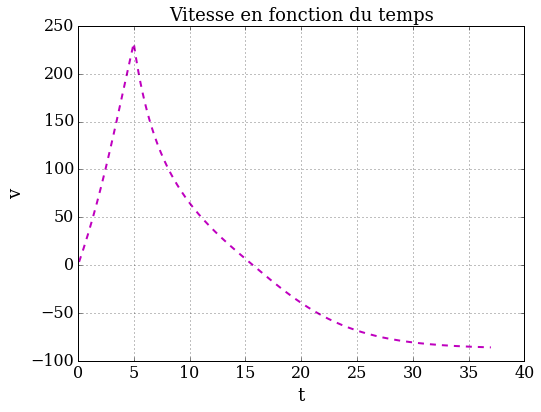

In [58]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'v', fontsize=18)
pyplot.title('Vitesse en fonction du temps', fontsize=18)
pyplot.plot(Tlog,Slog, 'r--', lw=2)

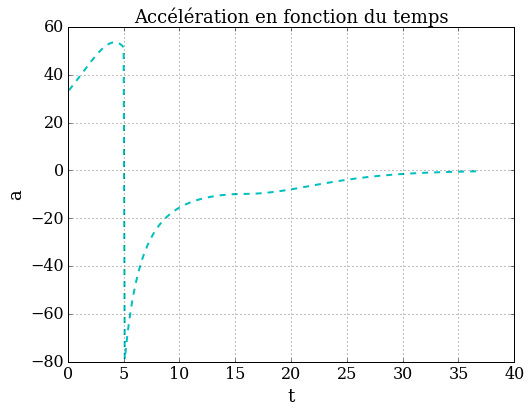

In [57]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'a', fontsize=18)
pyplot.title('Accélération en fonction du temps', fontsize=18)
pyplot.plot(Tlog,Alog, 'c--', lw=2)

Nous avons ci-dessous 3 variantes du code qui nous ont permis de répondre au questions du cours.

In [22]:
v=0.
h=0. 
t=0.
log=[]
Vm=0
TVm=0
HVm=0
while h>0. or t==0:
    a=acce(t,v)
    v=speed(a,v)
    t=round(t+.1,2) #utilisationd de round pour éviter de se retrouver avec t=4.999999 et de faire une itération de trop avec du fuel

    if Vm<v:
        Vm=v
        Tm=t
        HVm=h
    
    h=height(v,h)
    pas=[t,h,v,a]

    log.append(pas)
    

    
print(Vm,Tm,HVm)

232.10613341261794 5.0 523.5228342918477


In [17]:
v=0.
h=0. 
t=0.
log=[]
VHm=0
THm=0
Hm=0
while h>0. or t==0:
    a=acce(t,v)
    v=speed(a,v)
    h=height(v,h)
    t=round(t+.1,2) #utilisationd de round pour éviter de se retrouver avec t=4.999999 et de faire une itération de trop avec du fuel
    pas=[t,h,v,a]

    log.append(pas)
    if Hm<h:
        VHm=v
        THm=t
        Hm=h

    
print(VHm,THm,Hm)

0.7603973957922966 15.6 1334.1829454303072


In [20]:
v=0.
h=0. 
t=0.
log=[]
VHm=0
THm=0
Hm=0
while h>0. or t==0:
    a=acce(t,v)
    v=speed(a,v)
    h=height(v,h)
    t=round(t+.1,2) #utilisationd de round pour éviter de se retrouver avec t=4.999999 et de faire une itération de trop avec du fuel
    pas=[t,h,v]

    log.append(pas)
    

    
print(pas)

[37.0, 0.0, -85.97591348035239]
